PLEASE HAVE A LOOK AT THIS

The video for the assigment can be found here:

https://drive.google.com/file/d/1S3Ij3s0HspXfwhT9rdAaKqaTIjMoPoi8/view?usp=sharing

PLEASE COPY PASTE THIS AND VIEW IT. VIEW ACCESS HAS BEEN GIVEN


# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [1]:
#Importing libraries used in this assignment

import numpy as np
import random
import statistics 
import math as mt
from numpy.random import RandomState
import pandas as pd
from sklearn.metrics import accuracy_score 
from matplotlib.pyplot import *
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Since we need to remove punctuations the punctuations are defined below
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

#All stopwords distract classification and do not have any semanti connection with classification
# They need to be removed. Taken from NLTK list

stop_words = {"a", "about", "above", "across", "after", "afterwards", "again", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become","becomes", "becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can", "cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found", "four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
"this", "those", "though", "through", "throughout",
"thru", "thus", "to", "together", "too", "toward", "towards",
"under", "until", "up", "upon", "us",
"very", "was", "we", "well", "were", "what", "whatever", "when",
"whence", "whenever", "where", "whereafter", "whereas", "whereby",
"wherein", "whereupon", "wherever", "whether", "which", "while", 
"who", "whoever", "whom", "whose", "why", "will", "with",
"within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
    }

# Lemmatization is  important because each document a word can be written in different tenses, persons, singular or plural
# Lemmatization standardizes this - as probability is computed for exact words. If not done then "boys" and "boy" 
# will be treated separately

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

# Count of a word in a sequence of words is necessary for probability calculations
# Hence the Counter is imported

from collections import Counter
import io
import math
from array import *

# This function reads the raw text file and makes a list per line, inturn each list of a line comprises list of 
# words in that line. Sumup, it returns list of lists
# The input corpus_file is the first raw document

def read_corpus(corpus_file):
	out = []
	with io.open(corpus_file,encoding="utf-8") as f:
		for line in f:
			tokens = line.strip().split()
            # The first 3 words in each line are the <class, Sentiment, document name>. These are ignored
			out.append(tokens[3:])
	return out


### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [49]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""

# Removes all the punctuations present in the document
def remove_punctuation(doc,doctype,minwordlen):
    punct_corpus = read_corpus(doc) #no_punct_corpus becomes a array of list of strings removing the labels
    
    no_punct_corpus = []
    start = 0
    end = 0
    if (doctype == 0): #Training document 0 to 80% - 1
        start = 0
        end = int(math.ceil(0.8*len(punct_corpus)))
    if (doctype == 1): #Testing document 80% to 100%
        start = int(math.ceil(0.8*len(punct_corpus)))
        end = len(punct_corpus)
    #for each list in the array
    for i in range(start,end):
        no_punct_line_corpus = []
        for j in range(len(punct_corpus[i])):           
                       #For each string in the list of strings we test if it is a punctuation and remove the string
                      flag = 0;
                      for k in range(len(punct_corpus[i][j])):
                                        if punct_corpus[i][j][k] in punctuations: #Search character by character
                                            flag = 1
                                        if len(punct_corpus[i][j]) < minwordlen: #Throw out word length less than min
                                            flag = 1
                       
                      if (flag == 0):
                            no_punct_line_corpus.append(punct_corpus[i][j])
        no_punct_corpus.append(no_punct_line_corpus)
    return no_punct_corpus

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    no_stopword_corpus = []
    for i in range(len(doc)):
        no_stopword_line_corpus = []
        for j in range(len(doc[i])):
            if (doc[i][j] not in stop_words):
                no_stopword_line_corpus.append(doc[i][j])
        no_stopword_corpus.append(no_stopword_line_corpus)
    return no_stopword_corpus

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    no_lemmatize_corpus = []
    for i in range(len(doc)):
        no_lemmatize_line_corpus = []
        for j in range(len(doc[i])):
            no_lemmatize_line_corpus.append(lemmatizer.lemmatize(doc[i][j]))
        no_lemmatize_corpus.append(no_lemmatize_line_corpus)
    return no_lemmatize_corpus

def text_preprocess(doc,doctype,minwordlen):
    assert isinstance(doc,str)
    processed_doc = remove_punctuation(doc,doctype,minwordlen)
    #processed_doc = remove_stopwords(processed_doc) #Uncomment of removing stopwords
    processed_doc = lemmatize(processed_doc)
    return processed_doc


### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [50]:
# To make the program generic the following function sentiment_list_preprocess extracts the
# first token of the training documents which are the sentiment name
# The input "doc" is the raw input document
# doctype is 0 for training and 1 for testing
# threshold is set to 80%
# This function will also be called in testing phase for comparing the predicted sentiment with the actual sentiment
# The output is the list of sentiments that each document belong to in order.

def sentiment_list_preprocess(doc,doctype,threshold):
    out = []
    i = 0
    with io.open(doc,encoding="utf-8") as f:
        for line in f:
            if (doctype == 0):
                if (i < threshold): #Handling Training Phase
                    tokens = line.strip().split()
                    out.append(tokens[1])
            if (doctype == 1):
                if (i >= threshold): #Handling Testing phase
                    tokens = line.strip().split()
                    out.append(tokens[1])
            i = i + 1
    return out

#The following function calculates the probability of a word given a sentiment
# As probability will be less than 1 and too small, we take the logarithm
#We use Laplacian smoothing to avoid zero probability
# word: The input word
# sentiname: Name of the sentiment
# alpha: Positive Constant <= 1
# senti_word_count is a counter which given a word as input shall output the number of times the word appeared in documents
# belonging to the sentiment
# total_words_in_senti is the total number of words in all documents belonging to that sentiment
# sizeofVocal is the total number of unique words in the lemmatized, no stopword, no punctuation document.
# This is size of vocabulary
# The output is the probability in logarithm to base 10.
# Note that this value will be negative
# prob(given word|sentiment) = (count(given word in sentiment) + alpha)/(count(all words in sentiment) + alpha*size of Vocabulary)

def prob_word_given_senti(word,sentiname,alpha,senti_word_count,total_words_in_senti,sizeofVocal):
    value = math.log(senti_word_count[sentiname][word] + alpha,10) - math.log(total_words_in_senti + alpha * sizeofVocal,10)
    return value


#################################                 Training Phase           ##################################

text_corpus = text_preprocess('./all_sentiment_shuffled.txt',0,2) #All lines of text

senti_list_corpus = sentiment_list_preprocess('./all_sentiment_shuffled.txt',0,len(text_corpus)) #All lines of sentis

senti_database = list(dict.fromkeys(senti_list_corpus)) #getting unique different types of sentiments

senti_count = Counter(senti_list_corpus) #Each sentiment how many times appeared.

# The above two are necessary for Probability(sentiments)

senti_word_corpus = [0]*len(senti_database) #Word corpus for each senti
for i in range(len(senti_database)): #Initializing the structure
    senti_word_corpus[i] = []
    
"""

senti_word_database = [0]*len(senti_database) #Unique words in each senti
for i in range(len(senti_database)):
    senti_word_database[i] = []
"""

senti_word_count = [Counter() for i in range(len(senti_database))] #Word count in each senti


vocabulary = []

for i in range(len(text_corpus)):
    for j in range(len(text_corpus[i])):
        vocabulary.append(text_corpus[i][j]) #Make a single list of all words from the list of lists

vocabulary_database = list(dict.fromkeys(vocabulary)) #From the single list form a list of unique words
sizeofVocal = len(vocabulary_database) # Number of unique words, representing the vocabulary


#cnt = [Counter() for i in range(n)]
senti_dict = {  senti_database[i] : i for i in range(0, len(senti_database) ) } #Encoding each sentiment item with integer

#for each sentiment the list of words with repetition

for i in range(len(text_corpus)):
    for senti in senti_database:
        if (senti == senti_list_corpus[i]):
            for j in range(len(text_corpus[i])):
                senti_word_corpus[senti_dict[senti]].append(text_corpus[i][j])


total_words_in_senti = array('L',[])

#Computing Total words in Sentiment and count of each word per sentiment
for senti1 in senti_database:
    senti = senti_dict[senti1]
    total_words_in_senti.append(len(senti_word_corpus[senti]))
    senti_word_count[senti] = Counter(senti_word_corpus[senti])

#Computing Prob(Senti) for each class and sentiment

senti_prob_val = array('d',[])

for senti in senti_database:
    senti_prob_val.append(float(senti_count[senti])/len(senti_list_corpus))


###########################             Testing Phase                #####################################

test_text_corpus = text_preprocess('./all_sentiment_shuffled.txt',1,2) #All lines of text

test_senti_list_corpus = sentiment_list_preprocess('./all_sentiment_shuffled.txt',1,len(text_corpus)) #All lines of senti

alpha_seq = [0.35,1,1.8]

for alpha in alpha_seq:
    
    #alpha = 1.0 #alpha=1.8 including stopwords Pred:82.2837951301 
    
    correct_senti = 0
    total_senti = 0
    for i in range(len(test_text_corpus)):
        val = 1000000000
        maxsenti = 'none'
        for senti in senti_database:
            val1 = 0
            for j in range(len(test_text_corpus[i])):
                val1 = val1 + prob_word_given_senti(test_text_corpus[i][j],senti_dict[senti],alpha,senti_word_count,len(senti_word_corpus[senti_dict[senti]]),sizeofVocal)
            val1 = abs(val1 + math.log(senti_prob_val[senti_dict[senti]],10)) 
            if (val > val1):
                val = val1
                maxsenti = senti
        if (maxsenti == test_senti_list_corpus[i]):
            correct_senti = correct_senti + 1
        total_senti = total_senti + 1
    print( 'Our Method -\n Alpha: ',alpha, '\n Sentiment Accuracy: ',(float(correct_senti)/float(total_senti))*100 , '\n')



Our Method -
 Alpha:  0.35 
 Sentiment Accuracy:  80.73047858942066 

Our Method -
 Alpha:  1 
 Sentiment Accuracy:  81.57010915197314 

Our Method -
 Alpha:  1.8 
 Sentiment Accuracy:  82.28379513014274 



### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [5]:
#SKlearn implementation

#Convert text_corpus to lines of strings
ski_text_corpus = read_corpus('./all_sentiment_shuffled.txt');
string_text_corpus = []
for i in range(len(ski_text_corpus)):
        string_line_corpus = ""
        for j in range(len(ski_text_corpus[i])):
            string_line_corpus = " ".join([string_line_corpus,ski_text_corpus[i][j]])
        string_text_corpus.append(string_line_corpus)

#Form the label corpus
ski_label_corpus = []
with io.open('./all_sentiment_shuffled.txt',encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            ski_label_corpus.append(tokens[1])
            
            
#Encoding the feature set
from sklearn.feature_extraction.text import CountVectorizer
train_vect = CountVectorizer()
new_text_vect = train_vect.fit_transform(string_text_corpus)

#splitting the corpus and label to train and test categories
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_text_vect, ski_label_corpus, test_size=0.2,random_state=109)

#Training the classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0)
clf.fit(X_train,y_train)

#Predicting for testing cases
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Ski_Learn alpha = 1.0, Sentiment Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

#Repeat the same for alpha=1.8
clf = MultinomialNB(alpha=1.8)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
from sklearn import metrics
print("Ski_Learn alpha = 1.8, Sentiment Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

#*******OUR METHOD DOES BETTER THAN SKLEARN!!!*********

Ski_Learn alpha = 1.0, Sentiment Accuracy: 81.24213176668066
Ski_Learn alpha = 1.8, Sentiment Accuracy: 82.03944607637432


Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [6]:

#######################                 TESTING                  ###########################################3

#Generating uniformly sampled data points of a sine wave in the interval [0,1] for training
x1 = np.linspace(0,1,10);
x = x1.reshape(-1,1)
y = np.sin(2*np.pi*x);

#Adding Gaussian noise N(0,0.5), mean=0, variance=0.5
mean = 0;
variance = 0.5;
noise = random.gauss(mean,variance);
data = y + noise; #Training dataset 


### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

Visualising the plots and computing the coefficients and MSE values for training dataset


Coeffecients for M =  0 are [[0.]]
MSE for M =  0 is 0.45
Coeffecients for M =  1 are [[ 0.         -1.34876164]]
MSE for M =  1 is 0.26471539218077106
Coeffecients for M =  3 are [[  0.          10.64664004 -31.61477883  21.07651922]]
MSE for M =  3 is 0.006529498820893244
Coeffecients for M =  6 are [[ 0.00000000e+00  5.65130256e+00  1.00244572e+01 -9.66237212e+01
   1.34911125e+02 -5.39644499e+01 -2.86926038e-12]]
MSE for M =  6 is 1.4939897681104982e-05
Coeffecients for M =  9 are [[ 0.00000000e+00  6.27735815e+00  1.58539686e-01 -4.31219765e+01
   1.10277430e+01  3.95696989e+01  1.03048530e+02 -2.39484331e+02
   1.57531420e+02 -3.50069823e+01]]
MSE for M =  9 is 1.803964652869081e-28


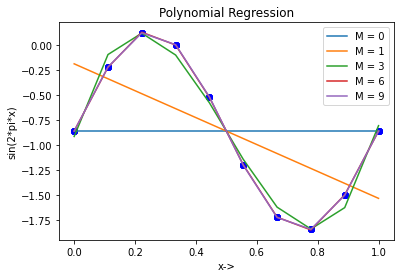

Visualising the plots and computing the coefficients and MSE values for validation dataset


Coeffecients for M =  0 are [[0.]]
MSE for M =  0 is 0.49499999999999994
Coeffecients for M =  1 are [[ 0.         -1.85269778]]
MSE for M =  1 is 0.20318064411612644
Coeffecients for M =  3 are [[  0.          11.81054489 -34.33032458  22.88688305]]
MSE for M =  3 is 0.004755878143712762
Coeffecients for M =  6 are [[ 0.00000000e+00  5.47308836e+00  1.09258029e+01 -9.86914534e+01
   1.37111377e+02 -5.48445509e+01  5.12856424e-12]]
MSE for M =  6 is 2.076339650899093e-05
Coeffecients for M =  9 are [[ 0.00000000e+00  6.28134024e+00  6.55147219e-02 -4.22875021e+01
   7.12592302e+00  5.01618680e+01  8.57450143e+01 -2.22723221e+02
   1.48668484e+02 -3.30374408e+01]]
MSE for M =  9 is 1.576706657961642e-11


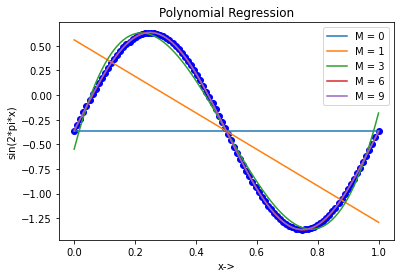

MSE versus polynomial order for training and validation data


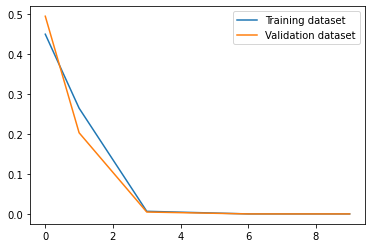

In [7]:
# Fitting Polynomial Regression model to the training dataset for varying polynomial orders - [0,1,3,6,9]

mse = [] #The mean squared error for different models on training dataset
M = [0,1,3,6,9]
print('Visualising the plots and computing the coefficients and MSE values for training dataset')
print('\n')

for degree in range(len(M)):
    poly = PolynomialFeatures(degree = M[degree]) 
    X_poly = poly.fit_transform(x) 
    poly.fit(X_poly, data) 
    linReg = LinearRegression() 
    linReg.fit(X_poly, data) 
    
    # Visualising the Polynomial Regression results 
    scatter(x, data, color = 'blue') 
    plot(x, linReg.predict(poly.fit_transform(x)), label= 'M = %s' % M[degree]) 
    title('Polynomial Regression') 
    xlabel('x->')
    ylabel('sin(2*pi*x)')
    legend()
    
    print('Coeffecients for M = ', M[degree] , 'are', linReg.coef_) #Returns coefficients
    
    mse.append(mean_squared_error(data,linReg.predict(poly.fit_transform(x)))) #Mean squared error
    
    print('MSE for M = ' , M[degree], 'is', mean_squared_error(linReg.predict(X_poly),data))
    
show() 


#######################                 VALIDATION                  ######################################3

#Generating uniformly sampled data points of a sine wave in the interval [0,1] for validation
x1_valid = np.linspace(0,1,100);
x_valid = x1_valid.reshape(-1,1)
y_valid = np.sin(2*np.pi*x_valid);

#Adding Gaussian noise 
mean_valid = 0;
variance_valid = 5;
noise_valid = random.gauss(mean_valid,variance_valid);
data_valid = y_valid + noise_valid; #Validation dataset

# Fitting Polynomial Regression model to the validation dataset for varying polynomial orders - [0,1,3,6,9]

mse_valid = [] #The mean squared error for different models on training dataset

print('Visualising the plots and computing the coefficients and MSE values for validation dataset')
print('\n')

scatter(x_valid, data_valid, color = 'blue') 

for degree in range(len(M)):
    poly_valid = PolynomialFeatures(degree = M[degree]) 
    X_poly_valid = poly_valid.fit_transform(x_valid) 
    poly_valid.fit(X_poly_valid, data_valid) 
    linReg_valid = LinearRegression() 
    linReg_valid.fit(X_poly_valid, data_valid) 
    
    # Visualising the Polynomial Regression results 
    plot(x_valid, linReg_valid.predict(poly_valid.fit_transform(x_valid)), label= 'M = %s' % M[degree]) 
    title('Polynomial Regression') 
    xlabel('x->')
    ylabel('sin(2*pi*x)')
    legend()
    
    print('Coeffecients for M = ', M[degree] , 'are', linReg_valid.coef_) #Returns coefficients
    
    mse_valid.append(mean_squared_error(data_valid,linReg_valid.predict(poly_valid.fit_transform(x_valid)))) #Mean squared error
    
    print('MSE for M = ' , M[degree], 'is', mean_squared_error(linReg_valid.predict(X_poly_valid),data_valid))
    
show() 

#Plotting MSE of validation and test data versus degree of polynomial
print('MSE versus polynomial order for training and validation data')
plot(M,mse,label ="Training dataset")
plot(M,mse_valid,label="Validation dataset")
legend()
show()



### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

Fitting Polynomial Regression model of degree 9 to the dataset 
Coeffecients for lambda =  0.01 are [[ 0.          1.72771505 -3.77712234 -2.35206693 -0.46221987  0.72507717
   1.21559476  1.21459546  0.90830917  0.42993793]]
MSE for lambda =  0.01 is 0.0702053152314708
Coeffecients for lambda =  0.1 are [[ 0.         -0.375636   -1.2769639  -0.93882244 -0.43702675 -0.01186367
   0.30511762  0.53051373  0.68726893  0.79477678]]
MSE for lambda =  0.1 is 0.13147667463147145
Coeffecients for lambda =  1 are [[ 0.         -0.44234607 -0.43664327 -0.29081413 -0.14782125 -0.03255276
   0.05585577  0.12293096  0.17396651  0.21311625]]
MSE for lambda =  1 is 0.24489773383839664


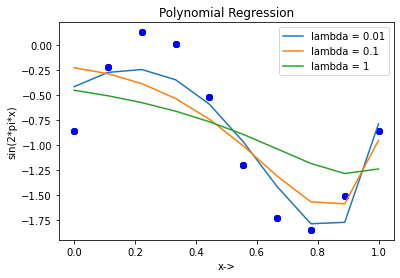

The optimal value of hyperparameter lamda is 1


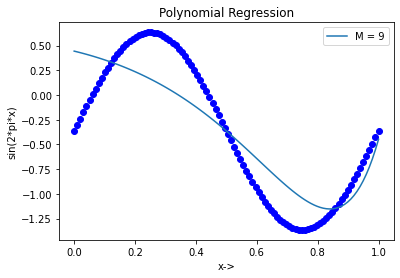

MSE for M = 9 (after regularisation) is 0.10830308910855672
MSE for M = 9 (without regularisation) is 1.576706657961642e-11


In [8]:
lamda = [0.01,0.1,1]

print('Fitting Polynomial Regression model of degree 9 to the dataset ')
for i in range(len(lamda)):
    # Fitting Polynomial Regression model of degree 9 to the dataset 
    poly = PolynomialFeatures(degree = 9) #degree =[0,1,3,6,9]
    X_poly = poly.fit_transform(x) #fit the data, then transform it
    poly.fit(X_poly, data) #computes the number of output features
    lin2 = Ridge(alpha = lamda[i]).fit(X_poly, data) 

    # Visualising the Polynomial Regression results 
    scatter(x, data, color = 'blue') 
    plot(x, lin2.predict(poly.fit_transform(x)), label = "lambda = %s" % lamda[i]) 
    title('Polynomial Regression') 
    xlabel('x->')
    ylabel('sin(2*pi*x)')
    legend()
    
    print('Coeffecients for lambda = ', lamda[i] , 'are', lin2.coef_) #Returns coefficients
    
    print('MSE for lambda = ' , lamda[i], 'is', mean_squared_error(lin2.predict(X_poly),data))
    
show() 

#Following loop aims to compute the best value of hyperparameter lamba
mse_testlamda = []
test_lamda = range(-10,10)
for i in test_lamda:
    poly = PolynomialFeatures(degree = 9) #degree =[0,1,3,6,9]
    X_poly = poly.fit_transform(x) #fit the data, then transform it
    poly.fit(X_poly, data) #computes the number of output features
    lin2 = Ridge(alpha = test_lamda[i]).fit(X_poly, data) 
    mse_testlamda.append( mean_squared_error(lin2.predict(X_poly),data) )
    #print('MSE for lambda = ' , test_lamda[i], 'is', mean_squared_error(lin2.predict(X_poly),data))
    ## Uncomment the above line if needed 

def minimum(a, n):  
    minpos = a.index(min(a))        
    opt_lamda = minpos + 1
    print( "The optimal value of hyperparameter lamda is", opt_lamda)
    return opt_lamda
     
opt_lamda = minimum(mse_testlamda, len(mse_testlamda))

#####################################         VALIDATION           ##############################################

#Using the optimal value of the hyperparameter, we now compute the mean squared error for a polynomial fit with degree 9

poly_valid = PolynomialFeatures(degree = 9) 
X_poly_valid = poly_valid.fit_transform(x_valid) 
poly_valid.fit(X_poly_valid, data_valid) 
linRidge = Ridge(alpha = opt_lamda).fit(X_poly_valid, data_valid) 

# Visualising the Polynomial Regression results 
scatter(x_valid, data_valid, color = 'blue') 
plot(x_valid, linRidge.predict(poly_valid.fit_transform(x_valid)), label= 'M = %s' % M[degree]) 
title('Polynomial Regression') 
xlabel('x->')
ylabel('sin(2*pi*x)')
legend()
show()

print('MSE for M = 9 (after regularisation) is', mean_squared_error(linRidge.predict(X_poly_valid),data_valid))
print('MSE for M = 9 (without regularisation) is', mse_valid[4])


### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

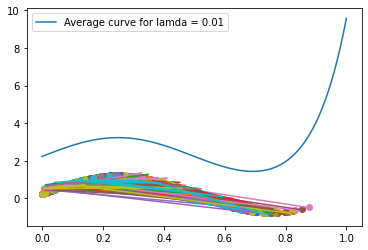

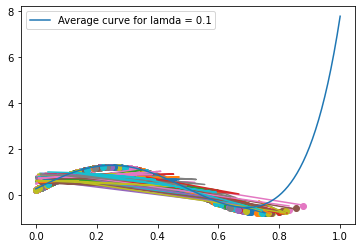

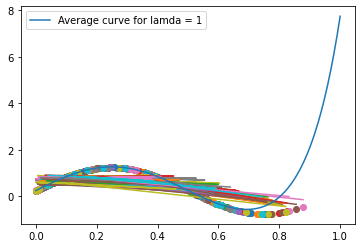

In [9]:
#Generating 500 sine wave samples (uniformly spaced between 0 to 1)

x1 = np.linspace(0,1,500);
y1 = np.sin(2*np.pi*x1);
xT = x1.reshape(-1,1)

#The question requires us to generate 50 datasets with 10 points each. So, from the 500 generated points generated 
#above, we will randomly partition them into a list of arrays, each array of size 10 and 50 such arrays arranged as a list

def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

xT = partition(xT,50) #50x10 array
y = np.zeros((50,10))

for i in range(len(xT)):
    for j in range(10):
        y[i][j] = np.sin(2*np.pi*xT[i][j])

#Adding Gaussian noise N(0,0.5), mean=0, variance=0.5
mean = 0;
variance = 0.5;
noise = random.gauss(mean,variance);
dataT = y + noise; #Training dataset

#To fit the average of 50 datasets, we will use the following 
pol = np.ones((50,10)) #polynomial coefficients obtained on fitting data
Ax = np.linspace(0,1,100) #set of data points that will be used as validation data 
Ay = Ax.shape[0]

# Fitting Polynomial Regression model of degree 9 to the dataset
for j in range(len(lamda)):
    for i in range(len(xT)):
        polyT = PolynomialFeatures(degree = 9) #degree =[0,1,3,6,9]
        X_polyT = polyT.fit_transform(xT[i]) #fit the data, then transform it
        c = polyT.fit(X_polyT, dataT[i]) #computes the number of output features
        lin2 = Ridge(alpha = lamda[j]).fit(X_polyT, dataT[i]) 

        # Visualising the Polynomial Regression results 
        scatter(xT[i], dataT[i]) 
        plot( xT[i], lin2.predict(X_polyT)) 
        
        temp1 = []
        temp2 = []
        for k in range(10):
            temp1.append(xT[i][k][0])
            temp2.append(dataT[i][k])
        pol[i] = np.polyfit(temp1,temp2,9)      
        
        Ay += np.polyval(pol[i], Ax)
        
    Ay = Ay/50
    plot(Ax,Ay,label="Average curve for lamda = %s" % lamda[j])
    legend()
    show()



#Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [10]:
#Splitting data into training and test data randomly 
df = pd.read_csv('data_prob3_parta.csv')
rng = RandomState()
train = df.sample(frac=0.75, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Normalisation of dataset points
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

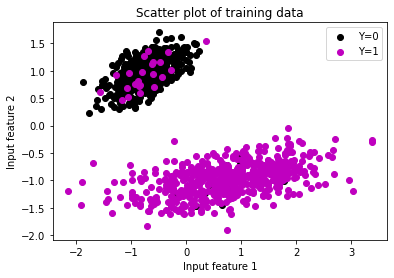

In [11]:
datalabel_10 = [];
datalabel_20 = [];
datalabel_11 = [];
datalabel_21 = [];

for i in range(len(y_train)):
    if y_train[i] == 0.0:
        datalabel_10.append(x_train[i,0]);
        datalabel_20.append(x_train[i,1]);
    else:
        datalabel_11.append(x_train[i,0]);
        datalabel_21.append(x_train[i,1]);

figure()
scatter(datalabel_10, datalabel_20,color='k',label="Y=0")
scatter(datalabel_11, datalabel_21,color='m',label="Y=1")
title('Scatter plot of training data')
ylabel('Input feature 2')
xlabel('Input feature 1')
legend()
show()


Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [12]:
#Appending a column of 1s to the training and test data to keep up with dimensional consistency
# theta_0 multiplies with x_0 = 1

x_train = np.hstack((np.matrix(np.ones(x_train.shape[0])).T, x_train))
x_test = np.hstack((np.matrix(np.ones(x_test.shape[0])).T, x_test))
theta = np.matrix(np.zeros(x_train.shape[1])) #weights

#Implementing logistic regression from scratch (using gradient descent)

#The following function is a sigmoid function which returns a value between 0 and 1
def sigmoid(theta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, theta.T))) 

def log_gradient(theta, x, y): 
    a = sigmoid(theta, x) - y.reshape(x.shape[0], -1) 
    b = np.dot(a.T, x) 
    return b 

#The following fucntion is the cost function that needs to be minimised
def cost_func(theta, x, y): 
    log_func = sigmoid(theta, x) 
    y = np.squeeze(y) 
    a = y * np.log(log_func) 
    b = (1 - y) * np.log(1 - log_func) 
    final = -a - b 
    return np.mean(final)

#Predicting labels of a given x
def pred_values(theta, x): 
    pred_prob = sigmoid(theta, x) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

#GDA
def gradient_descent(x, y, theta):
    alpha = 0.01
    converge_change=0.001
    cost = cost_func(theta, x, y) 
    change_cost = 1
    num_iter = 1 
    while(change_cost > converge_change): 
        old_cost = cost 
        theta = theta - (alpha * log_gradient(theta, x, y)) 
        cost = cost_func(theta, x, y) 
        change_cost = old_cost - cost 
        num_iter += 1
    return theta, num_iter  

#Plotting the test data points and decision boundary
def plot_reg(x, y, theta):
    # labelled observations 
    x_0 = x[np.where(y == 0.0)] 
    x_1 = x[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    scatter([x_0[:, 1]], [x_0[:, 2]], c='k', label='y = 0') 
    scatter([x_1[:, 1]], [x_1[:, 2]], c='m', label='y = 1') 
    
    title('Test data classification')
    ylabel('Input feature 2')
    xlabel('Input feature 1')
    legend()
    
    # plotting decision boundary 
    x1 = np.arange(-2, 3, 0.1) 
    x2 = -(theta[0,0] + theta[0,1]*x1)/theta[0,2] 
    plot(x1, x2, c='r', label='Decision boundary') 
    legend() 
    show() 

############################      Logistic regression model using scikit library       ###########################
 
classifier = LogisticRegression(random_state = 0).fit(x_train, y_train) 


Print the final weights.

In [13]:
theta, num_iter = gradient_descent(x_train, y_train, theta)
print('The weights are', theta)
print('The number of epochs are',num_iter)


The weights are [[ 0.30387138  0.9293756  -2.97231359]]
The number of epochs are 35


Print the final accuracy on test data.

In [14]:
y_pred = pred_values(theta, x_test)
num_correct_preds = np.sum(y_pred == y_test)
accuracy = num_correct_preds/len(y_test);
print("Accuracy (implementation from scratch)" , accuracy)

y_pred = classifier.predict(x_test) 
print ("Accuracy obtained using scikit library ", accuracy_score(y_test, y_pred)) 


Accuracy (implementation from scratch) 0.9653333333333334
Accuracy obtained using scikit library  0.9653333333333334


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

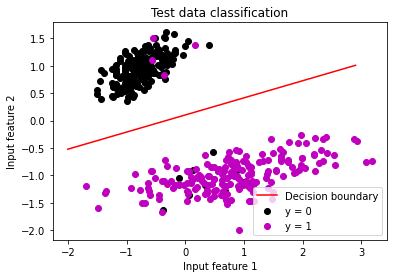

In [15]:
plot_reg(x_test, y_test, theta) #Plotting test data

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [16]:
#Splitting data into training and test data
df = pd.read_csv('data_prob3_partb.csv')
rng = RandomState()
train = df.sample(frac=0.75, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Normalisation of dataset points
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

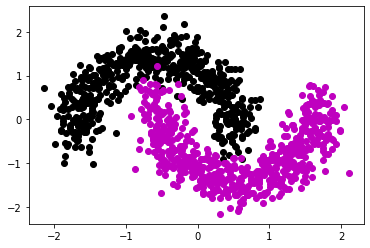

In [17]:
datalabel_10 = [];
datalabel_20 = [];
datalabel_11 = [];
datalabel_21 = [];

for i in range(len(y_train)):
    if y_train[i] == 0.0:
        datalabel_10.append(x_train[i,0]);
        datalabel_20.append(x_train[i,1]);
    else:
        datalabel_11.append(x_train[i,0]);
        datalabel_21.append(x_train[i,1]);

figure()
scatter(datalabel_10, datalabel_20,color='k')
scatter(datalabel_11, datalabel_21,color='m')
show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [18]:
#Appending a column of 1s to the training and test data to keep up with dimensional consistency
# theta_0 multiplies with x_0 = 1

x_train = np.hstack((np.matrix(np.ones(x_train.shape[0])).T, x_train))
x_test = np.hstack((np.matrix(np.ones(x_test.shape[0])).T, x_test))
theta = np.matrix(np.zeros(x_train.shape[1])) #weights

#Implementing logistic regression from scratch (using gradient descent)

#The following function is a sigmoid function which returns a value between 0 and 1
def sigmoid(theta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, theta.T))) 

def log_gradient(theta, x, y): 
    a = sigmoid(theta, x) - y.reshape(x.shape[0], -1) 
    b = np.dot(a.T, x) 
    return b 

#The following function is the cost function that needs to be minimised
def cost_func(theta, x, y): 
    log_func = sigmoid(theta, x) 
    y = np.squeeze(y) 
    a = y * np.log(log_func) 
    b = (1 - y) * np.log(1 - log_func) 
    final = -a - b 
    return np.mean(final)

#Predicting labels of a given x
def pred_values(theta, x): 
    pred_prob = sigmoid(theta, x) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

#GDA
def gradient_descent(x, y, theta):
    alpha= 0.01
    converge_change=0.001
    cost = cost_func(theta, x, y) 
    change_cost = 1
    num_iter = 1 
    while(change_cost > converge_change): 
        old_cost = cost 
        theta = theta - (alpha * log_gradient(theta, x, y)) 
        cost = cost_func(theta, x, y) 
        change_cost = old_cost - cost 
        num_iter += 1
    return theta, num_iter  

#Plotting the test data points and decision boundary
def plot_reg(x, y, theta):
    # labelled observations 
    x_0 = x[np.where(y == 0.0)] 
    x_1 = x[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    scatter([x_0[:, 1]], [x_0[:, 2]], c='k', label='y = 0') 
    scatter([x_1[:, 1]], [x_1[:, 2]], c='m', label='y = 1') 
    
    title('Test data classification')
    ylabel('Input feature 2')
    xlabel('Input feature 1')
    legend()
    
    # plotting decision boundary 
    x1 = np.arange(-2, 3, 0.1) 
    x2 = -(theta[0,0] + theta[0,1]*x1)/theta[0,2] 
    plot(x1, x2, c='r', label='Decision boundary') 
    legend() 
    show() 

############################      Logistic regression model using scikit library       ###########################

classifier = LogisticRegression(random_state = 0).fit(x_train, y_train) 


Print the final weights.

In [19]:
theta, num_iter = gradient_descent(x_train, y_train, theta)
print('The weights are', theta)
print('The number of epochs are',num_iter)
THETA = theta #will be used in part(c)

The weights are [[ 0.05576348  1.10141595 -2.60739481]]
The number of epochs are 19


Print the final accuracy on test data.

In [20]:
y_pred = pred_values(theta, x_test)
num_correct_preds = np.sum(y_pred == y_test)
accuracy = num_correct_preds/len(y_test);
print("Accuracy (implementation from scratch)" , accuracy)

y_pred = classifier.predict(x_test) 
print ("Accuracy obtained using scikit library ", accuracy_score(y_test, y_pred))

Accuracy (implementation from scratch) 0.8666666666666667
Accuracy obtained using scikit library  0.8666666666666667


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

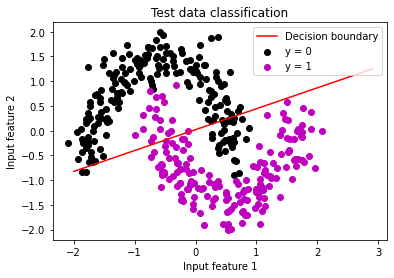

In [21]:
plot_reg(x_test, y_test, theta) #Plotting test data

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


In [22]:
#Splitting data into training and test data
df = pd.read_csv('data_prob3_partb.csv')
rng = RandomState()
train = df.sample(frac=0.75, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Normalisation of the dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

In [23]:
#Transforming x_train and x_test datasets

def transform (T, x_train, x_test):
    rows, cols = (x_train.shape[0], 2*T)
    x_txn = [[0]*cols]*rows 
    rows, cols = (x_test.shape[0], 2*T)
    x_txn_test = [[0]*cols]*rows 

    for i in range(len(x_train)):
        x_line = []
        for degree in range(T-1):
            x_line.append(pow(x_train[i,0],degree+2));
            x_line.append(pow(x_train[i,1],degree+2));
        x_txn[i] = np.append(x_train[i,:], x_line)

    for i in range(len(x_test)):
        x_line_test = []
        for degree in range(T-1):
            x_line_test.append(pow(x_test[i,0],degree+2));
            x_line_test.append(pow(x_test[i,1],degree+2));
        x_txn_test[i] = np.append(x_test[i,:], x_line_test) 
        
    return x_txn, x_txn_test


Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [24]:
#Implementing logistic regression from scratch (using gradient descent)
#The following function is a sigmoid function which returns a value between 0 and 1

alpha = 0.001 #LEARNING RATE

def sigmoid(theta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, theta.T))) 

def log_gradient(theta, x, y): 
    a = sigmoid(theta, x) - y.reshape(x.shape[0], -1) 
    b = np.dot(a.T, x) 
    return b 

#The following function is the cost function that needs to be minimised
def cost_func(theta, x, y): 
    log_func = sigmoid(theta, x) 
    y = np.squeeze(y) 
    a = y * np.log(log_func) 
    b = (1 - y) * np.log(1 - log_func) 
    final = -a - b 
    return np.mean(final)

#Predicting labels of a given x
def pred_values(theta, x): 
    pred_prob = sigmoid(theta, x) 
    pred_value = np.where(pred_prob >= 0.5, 1, 0) 
    return np.squeeze(pred_value)

#GDA
def gradient_descent(x, y, theta):
    converge_change=0.001
    cost = cost_func(theta, x, y) 
    change_cost = 1
    num_iter = 1 
    while(change_cost > converge_change): 
        old_cost = cost 
        theta = theta - (alpha * log_gradient(theta, x, y)) 
        cost = cost_func(theta, x, y) 
        change_cost = old_cost - cost 
        num_iter += 1
    return theta, num_iter  

#Plotting the test data points and decision boundary
def plot_reg(x, y, theta):
    # labelled observations 
    x_0 = x[np.where(y == 0.0)] 
    x_1 = x[np.where(y == 1.0)] 
      
    #Using grid of 60 X 60 wth cell size 0.1
    dis_plot_poly = np.zeros( (600,600))

    for i in range(-20,30):
        for j in range(-20,30):
            data_point = np.array([0.1*i, 0.1*j])
            dp_txn = np.hstack((1, data_point))
            if (sigmoid(theta, dp_txn) >= 0.5):
                dis_plot_poly[i][j] = 1 
            else:
                dis_plot_poly[i][j] = 0 
                
    datalabel_01 = []
    datalabel_11 = []
    datalabel_00 = []
    datalabel_10 = []
    disdatalabel_01 = []
    disdatalabel_11 = []
    disdatalabel_00 = []
    disdatalabel_10 = []

    for i in range(-20,30):
        for j in range(-20,30):
            if (dis_plot_poly[i][j] == 0): 
                disdatalabel_00.append(i*0.1)
                disdatalabel_10.append(j*0.1)
            if (dis_plot_poly[i][j] == 1): 
                disdatalabel_01.append(i*0.1)
                disdatalabel_11.append(j*0.1)
                
            
    figure()
    scatter(disdatalabel_00, disdatalabel_10,color='r')
    scatter(disdatalabel_01, disdatalabel_11,color='k')
    scatter([x_0[:, 1]], [x_0[:, 2]], c='r', label='y = 0') 
    scatter([x_1[:, 1]], [x_1[:, 2]], c='k', label='y = 1') 
    axes = gca()
    axes.set_ylim([-2,3])
    axes.set_xlim([-2,3])
    title('Test data classification')
    ylabel('Input feature 2')
    xlabel('Input feature 1')
    legend()
    show()



Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

In [25]:
T = [3,4,5,6,7,8,9,10]
print("Values of T used are", T)

Values of T used are [3, 4, 5, 6, 7, 8, 9, 10]


Print the final weights.

In [26]:
for t in T:
    x_txn, x_txn_test = transform(t, x_train, x_test)
    x_txn = np.hstack((np.matrix(np.ones(len(x_txn))).T, x_txn))
    x_txn_test = np.hstack((np.matrix(np.ones(len(x_txn_test))).T, x_txn_test))
    theta = np.matrix(np.zeros(x_txn.shape[1])) 
    theta, num_iter = gradient_descent(x_txn, y_train, theta)
    print('The weights for T =',t, 'are', theta)
    print('The number of epochs for T = ', t , 'are',num_iter)
    

The weights for T = 3 are [[-0.00989652 -5.23515722 -1.69577944 -0.21455517  0.34852988  4.26852961
  -2.39220657]]
The number of epochs for T =  3 are 358
The weights for T = 4 are [[ 4.99935264e-04 -5.07053686e+00 -1.67603168e+00 -2.80408607e-01
   2.40785719e-01  4.13208937e+00 -2.36599612e+00  6.15721436e-02
   1.14999443e-01]]
The number of epochs for T =  4 are 335
The weights for T = 5 are [[-0.0105      0.32347285 -0.42010344 -0.00716673 -0.01231689  0.7504583
  -0.72090076  0.00998841 -0.04930931  1.91265366 -1.58035738]]
The number of epochs for T =  5 are 2
The weights for T = 6 are [[-0.0105      0.32347285 -0.42010344 -0.00716673 -0.01231689  0.7504583
  -0.72090076  0.00998841 -0.04930931  1.91265366 -1.58035738  0.12240989
  -0.19369978]]
The number of epochs for T =  6 are 2
The weights for T = 7 are [[-0.0105      0.32347285 -0.42010344 -0.00716673 -0.01231689  0.7504583
  -0.72090076  0.00998841 -0.04930931  1.91265366 -1.58035738  0.12240989
  -0.19369978  5.33806349

Print the final accuracy on transformed test data.

In [27]:
print ("Learning rate = ", alpha )
print (" T \t Accuracy obtained using scikit library \t Accuracy implementation from scratch ")

for t in T:
    x_txn, x_txn_test = transform(t, x_train, x_test)
    #print(x_txn)

    x_txn = np.hstack((np.matrix(np.ones(len(x_txn))).T, x_txn))
    x_txn_test = np.hstack((np.matrix(np.ones(len(x_txn_test))).T, x_txn_test))
    theta = np.matrix(np.zeros(x_txn.shape[1])) 
    theta, num_iter = gradient_descent(x_txn, y_train, theta)
    y_pred = pred_values(theta, x_txn_test)
    num_correct_preds = np.sum(y_pred == y_test)
    accuracy = num_correct_preds/len(y_test);
    
    ############################      Logistic regression model using scikit library       ###########################

    classifier = LogisticRegression(random_state = 0).fit(x_txn, y_train) 
    y_pred = classifier.predict(x_txn_test) 
    
    #Displaying values of accuracy
    print (t, accuracy_score(y_test, y_pred), accuracy)

Learning rate =  0.001
 T 	 Accuracy obtained using scikit library 	 Accuracy implementation from scratch 
3 0.992 0.9866666666666667
4 0.9893333333333333 0.984
5 0.9893333333333333 0.8293333333333334
6 0.9893333333333333 0.8293333333333334
7 0.9893333333333333 0.8266666666666667
8 0.9893333333333333 0.8266666666666667
9 0.9893333333333333 0.8266666666666667
10 0.9893333333333333 0.8266666666666667


Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

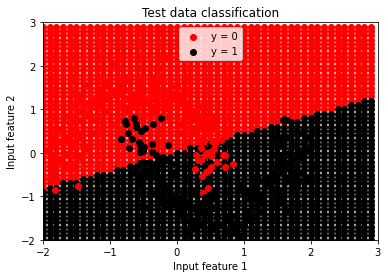

In [28]:
plot_reg(x_txn_test, y_test, THETA)


## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [29]:
#Splitting data into training and test data
df = pd.read_csv('data_prob3_partd.csv')
rng = RandomState()
train = df.sample(frac=0.75, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#print(x_train)
class_database = list(dict.fromkeys(y_train))
#print(class_database)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

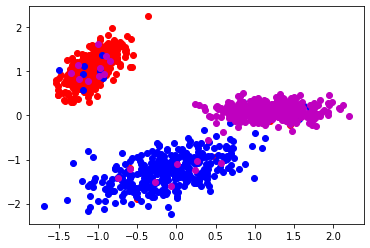

In [30]:
datalabel_10 = [];
datalabel_20 = [];
datalabel_11 = [];
datalabel_21 = [];
datalabel_12 = [];
datalabel_22 = [];

for i in range(len(y_train)):
    if y_train[i] == 0.0:
        datalabel_10.append(x_train[i,0]);
        datalabel_20.append(x_train[i,1]);
    elif y_train[i] == 1.0:
        datalabel_11.append(x_train[i,0]);
        datalabel_21.append(x_train[i,1]);
    else:
        datalabel_12.append(x_train[i,0]);
        datalabel_22.append(x_train[i,1]);
figure()
scatter(datalabel_10, datalabel_20,color='r')
scatter(datalabel_11, datalabel_21,color='b')
scatter(datalabel_12, datalabel_22,color='m')
show()

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [31]:
X = x_train
Y = y_train
classifier = LogisticRegression(random_state = 0).fit(X, Y)
y_pred = classifier.predict(x_test)

Print the final weights.

In [32]:
W = classifier.coef_
print("The final weights are", W )

The final weights are [[-1.25947974  1.36119579]
 [-0.46806082 -2.22626851]
 [ 1.72754056  0.86507272]]


Print the final accuracy on test data.

In [33]:
print ("Accuracy: ", accuracy_score(y_test, y_pred)) 

Accuracy:  0.9386666666666666


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

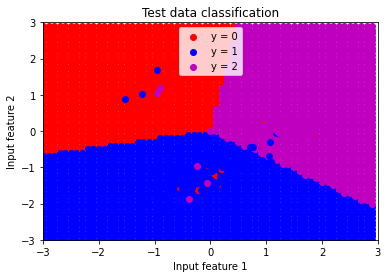

In [34]:
import numpy as numpy
# softmax function for multi class logistic regression
def softmax(W,x):
    vec=numpy.dot(x,W.T);
    #vec=numpy.add(vec,b);
    vec1=numpy.exp(vec);
    res=vec1.T/numpy.sum(vec1);
    return res.T;

# function predicts the probability of input vector
# the output y is MX1 vector (M is no of classes)
def predict(x):
    y=softmax(W,x);
    return y;

# function returns the lables corresponding to the input y
def lable(y):
    return labels[y];

# function classifies the input vector x into one of output lables
# input is NXD vector then output is NX1 vector

def classify(x):
    result= predict(x);
    maxele = max(result)
    for i in range(len(result)):
        if maxele == result[i]:
            maxpos = i        
    return maxpos;

def plot_reg(x, y):
    # labelled observations 
    x_0 = x[np.where(y == 0.0)] 
    x_1 = x[np.where(y == 1.0)] 
    x_2 = x[np.where(y == 2.0)]
    
    #Using grid of 70 X 70 wth cell size 0.1
    dis_plot_poly = np.zeros( (700,700))

    for i in range(-30,30):
        for j in range(-30,30):
            data_point = np.array([0.1*i, 0.1*j])
            if (classify(data_point) == 0):
                dis_plot_poly[i][j] = 0 
            elif (classify(data_point) == 1):
                dis_plot_poly[i][j] = 1
            else:
                dis_plot_poly[i][j] = 2
                
    datalabel_00 = []
    datalabel_10 = []
    datalabel_01 = []
    datalabel_11 = []
    datalabel_02 = []
    datalabel_12 = []
    disdatalabel_00 = []
    disdatalabel_10 = []
    disdatalabel_01 = []
    disdatalabel_11 = []
    disdatalabel_02 = []
    disdatalabel_12 = []
    
        
    for i in range(-30,30):
        for j in range(-30,30):
            if (dis_plot_poly[i][j] == 0): 
                disdatalabel_00.append(i*0.1)
                disdatalabel_10.append(j*0.1)
            if (dis_plot_poly[i][j] == 1): 
                disdatalabel_01.append(i*0.1)
                disdatalabel_11.append(j*0.1)
            if (dis_plot_poly[i][j] == 2): 
                disdatalabel_02.append(i*0.1)
                disdatalabel_12.append(j*0.1)
                
            
    figure()
    scatter(disdatalabel_00, disdatalabel_10,color='r')
    scatter(disdatalabel_01, disdatalabel_11,color='b')
    scatter(disdatalabel_02, disdatalabel_12,color='m')    
    scatter([x_0[:, 0]], [x_0[:, 1]], c='r', label='y = 0') 
    scatter([x_1[:, 0]], [x_1[:, 1]], c='b', label='y = 1') 
    scatter([x_2[:, 0]], [x_2[:, 1]], c='m', label='y = 2')
    axes = gca()
    axes.set_ylim([-3,3])
    axes.set_xlim([-3,3])
    title('Test data classification')
    ylabel('Input feature 2')
    xlabel('Input feature 1')
    legend()
    show()

x_test.reshape(-1,1)
plot_reg(x_test, y_test)

# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [35]:
import numpy
import math
#Extract data and partition from the CSV file
inp = pd.read_csv('Cric_data.csv',usecols=['Batting Average', 'Bowling Average','Player Role']);
#print(inp)

#Splitting data into training (75%) and test (25%) data
rng = RandomState()
train = inp.sample(frac=0.75, random_state=rng)
test = inp.loc[~inp.index.isin(train.index)]
#print(train)
#print(test)

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Encoding the labels 
le = preprocessing.LabelEncoder()
le.fit(y_train)
le.fit(y_test)
#print(le.classes_) #['Allrounder' 'Batsman' 'Bowler'] - ['0','1','2'] 
y_train = le.transform(y_train)
y_test = le.transform(y_test)
#print(y_train)
#print(le.inverse_transform(y_train))


**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

Linear Predictor: Prediction Accuracy = 81.5
Bayesian Predictor: Prediction Accuracy = 90.0


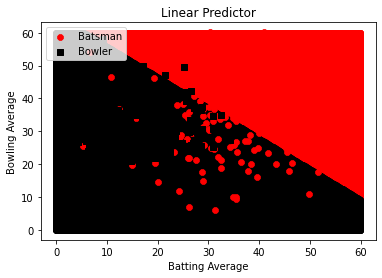

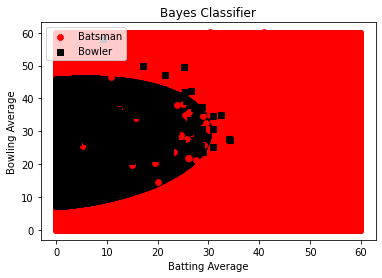

In [36]:
#Defined variables whose meanings are self explanatory
bowling_avg_bowler = 0.0
bowling_avg_batsman = 0.0
batting_avg_bowler = 0.0
batting_avg_batsman = 0.0
num_bowler_in_training = 0
num_batsman_in_training = 0
probability_bowler = 0.0
probability_batsman = 0.0

x_train_final = []
y_train_final = []

for index in range(len(y_train)):
    if y_train[index] == 1:
        y_train_final.append(-1) # -1 indicates Batsman as per CSV file
        x_train_final.append([x_train[index,0],x_train[index,1]])
        batting_avg_batsman += x_train[index,0]
        bowling_avg_batsman += x_train[index,1]
        num_batsman_in_training += 1
    elif y_train[index] == 2:
        y_train_final.append(1) # 1 indicates Bowler as per CSV file
        x_train_final.append([x_train[index,0],x_train[index,1]])
        batting_avg_bowler += x_train[index,0]
        bowling_avg_bowler += x_train[index,1]
        num_bowler_in_training += 1

total_training_data = num_bowler_in_training + num_batsman_in_training

probability_batsman = float(num_batsman_in_training)/total_training_data
probability_bowler = float(num_bowler_in_training)/float(total_training_data)
batting_avg_batsman = float(batting_avg_batsman)/num_batsman_in_training #mu_minusOne[0]
batting_avg_bowler = float(batting_avg_bowler)/num_bowler_in_training #mu_plusOne[0]
bowling_avg_batsman = float(bowling_avg_batsman)/num_batsman_in_training #mu_minusOne[1]
bowling_avg_bowler = float(bowling_avg_bowler)/num_bowler_in_training #mu_plusOne[1]
bat11_var = numpy.float128(0) #Sigma_minusOne[1,1]
bat22_var = numpy.float128(0) #Sigma_minusOne[2,2]
bat12_var = numpy.float128(0) #sigma_minusOne[1,2] = sigma_minusOne[2,1]
bowl11_var = numpy.float128(0) #Sigma_plusOne[1,1]
bowl12_var = numpy.float128(0) #Sigma_plusOne[2,2]
bowl22_var = numpy.float128(0) #Sigma_plusOne[1,2] = Sigma_plusOne[2,1]

for i in range(total_training_data):
    if y_train_final[i] == -1: #Batsman
        bat11_var += (x_train_final[i][0] - batting_avg_batsman)**2
        bat12_var += (x_train_final[i][0] - batting_avg_batsman)*(x_train_final[i][1] - bowling_avg_batsman)
        bat22_var += (x_train_final[i][1] - bowling_avg_batsman)**2 
    else:                     #Bowler
        bowl11_var += (x_train_final[i][0] - batting_avg_bowler)**2
        bowl12_var += (x_train_final[i][0] - batting_avg_bowler)*(x_train_final[i][1] - bowling_avg_bowler)
        bowl22_var += (x_train_final[i][1] - bowling_avg_bowler)**2 


#Co-Variance Matrix Batsman - Forming Sigma_minusOne Matrix
bat11_var = numpy.float128(bat11_var)/num_batsman_in_training
bat12_var = numpy.float128(bat12_var)/num_batsman_in_training
bat22_var = numpy.float128(bat22_var)/num_batsman_in_training
batcor12 = numpy.float128(bat12_var)/numpy.float128(math.sqrt(bat11_var)*math.sqrt(bat22_var))
detbat = numpy.float128(bat11_var*bat22_var - (bat12_var**2))
                      
#Co-Variance Matrix Bowler - Forming Sigma_plusOne Matrix
bowl11_var = numpy.float128(bowl11_var)/num_bowler_in_training
bowl12_var = numpy.float128(bowl12_var)/num_bowler_in_training
bowl22_var = numpy.float128(bowl22_var)/num_bowler_in_training
bowlcor12 = numpy.float128(bowl12_var)/numpy.float128(math.sqrt(bowl11_var)*math.sqrt(bowl22_var))
detbowl = numpy.float128(bowl11_var*bowl22_var - (bowl12_var**2))

batcoeff = 1/(2*(1-batcor12**2)) # This is needed for Bayesian
bowlcoeff = 1/(2*(1-bowlcor12**2)) # This is needed for Bayesian

#Prob(Bowler|(BatAvg,BowlAvg)) = Prob((BatAvg,BowlAvg)|Bowler) * Prob(Bowler)/Prob(BatAvg,BowlAvg)
#Prob(Batsman|(BatAvg,BowlAvg)) = Prob((BatAvg,BowlAvg)|Batsman) * Prob(Batsman)/Prob(BatAvg,BowlAvg)
#Compare: Prob((BatAvg,BowlAvg)|Bowler) * Prob(Bowler) ? Prob((BatAvg,BowlAvg)|Batsman) * Prob(Batsman)
#For Linear: Prob((BatAvg,BowlAvg)| Bowler) follows N(muPlusOne,Identity)
# and rob((BatAvg,BowlAvg)| Batsman) follows N(muMinusOne,Identity)

#ln(Prob((x0,x1)|Batsman)) = -((x0-muMinusOne[0])**2 + (x1-muMinusOne[1])**2)/2 + ln(Prob(Batsman))
#ln(Prob((x0,x1)|Bowler)) = -((x0-muPlusOne[0])**2 + (x1-muPlusOne[1])**2)/2 + ln(Prob(Bowler))

#Testing Linear Predictor
correct_prediction = 0
total_prediction = 0
x_test_final = []
y_test_final = []
Y_test_pred_lin = []
for index in range(len(y_test)):
    if y_test[index] == 1:
        y_test_final.append(-1) # -1 indicates Batsman as per CSV file
        x_test_final.append([x_test[index,0],x_test[index,1]])
    elif y_test[index] == 2:
        y_test_final.append(1) # 1 indicates Bowler as per CSV file
        x_test_final.append([x_test[index,0],x_test[index,1]])
    if y_test[index] != 0:
        temp_batsman = - ((x_test[index,0] - batting_avg_batsman)**2 + (x_test[index,1] - bowling_avg_batsman)**2)/2 + numpy.log (probability_batsman)
        temp_bowler = - ( (x_test[index,0] - batting_avg_bowler)**2 + (x_test[index,1] - bowling_avg_bowler)**2)/2 + numpy.log (probability_bowler)
        if (temp_batsman < temp_bowler):
            predict = 2
            Y_test_pred_lin.append(1)
        else:
            predict = 1
            Y_test_pred_lin.append(-1)
        if (predict == y_test[index]):
            correct_prediction += 1
        total_prediction +=1
     
    
print ("Linear Predictor: Prediction Accuracy =", float(correct_prediction)*100/total_prediction)

#Creating Data for ploting
#Using grid of 60 X 60 wth cell size 0.1
dis_plot_linear = np.zeros( (600,600))

for i in range(600):
    for j in range(600):
        temp_batsman = - ((i*0.1 - batting_avg_batsman)**2 + (j*0.1 - bowling_avg_batsman)**2)/2 + np.log (probability_batsman)
        temp_bowler = - ( (i*0.1 - batting_avg_bowler)**2 + (j*0.1 - bowling_avg_bowler)**2)/2 + np.log (probability_bowler)
        if (temp_batsman < temp_bowler):
            dis_plot_linear[i][j] = 1 #Bowler
        else:
            dis_plot_linear[i][j] = -1 #Batsman

#For Bayesian: Prob((BatAvg,BowlAvg)| Bowler) follows N(muPlusOne,SigmaPlusOne)
# and rob((BatAvg,BowlAvg)| Batsman) follows N(muMinusOne,SigmaMinusOne)

#ln(Prob((x0,x1)|Batsman)) = -((x0-muMinus[0])**2/SMinu[1,1] + (x1-muMinus[1])**2)/SMinu[2,2] -2*batcor12*(x0-muMinus[0])*(x1-muMinus[1])/sqrt(Sminu[1,1]*SMinu[2,2]))*bat_coeff - ln(det(SigmaMinus))/2 + ln(Prob(Batsman))
#ln(Prob((x0,x1)|Bowler)) = -((x0-muPlus[0])**2/SPlus[1,1] + (x1-muPlus[1])**2)/SPlus[2,2] -2*bowlcor12*(x0-muPlus[0])*(x1-muPlus[1])/sqrt(SPlus[1,1]*SSplu[2,2]))*bowl_coeff - ln(det(SigmaPlus))/2 + ln(Prob(Bowler))

#Testing Bayesian Classifier
correct_prediction = 0
total_prediction = 0
x_test_final = []
y_test_final = []
Y_test_pred_bayes = []
for index in range(len(y_test)):
    if y_test[index] == 1:
        y_test_final.append(-1) # -1 indicates Batsman as per CSV file
        x_test_final.append([x_test[index,0],x_test[index,1]])
    elif y_test[index] == 2:
        y_test_final.append(1) # 1 indicates Bowler as per CSV file
        x_test_final.append([x_test[index,0],x_test[index,1]])
    if y_test[index] != 0:
        temp_batsman = -( ( (x_test[index,0] - batting_avg_batsman)**2/bat11_var + (x_test[index,1] - bowling_avg_batsman)**2/bat22_var - 2*batcor12*((x_test[index,0]-batting_avg_batsman)*(x_test[index,1]-bowling_avg_batsman)/(math.sqrt(bat11_var)*math.sqrt(bat22_var)))))*batcoeff - numpy.log(detbat)/2 + numpy.log (probability_batsman)
        temp_bowler = -( ( (x_test[index,0] - batting_avg_bowler)**2/bowl11_var + (x_test[index,1] - bowling_avg_bowler)**2/bowl22_var - 2*bowlcor12*((x_test[index,0]-batting_avg_bowler)*(x_test[index,1]-bowling_avg_bowler)/(math.sqrt(bowl11_var)*math.sqrt(bowl22_var)))))*bowlcoeff -numpy.log(detbowl)/2 + numpy.log (probability_bowler)
        if (temp_batsman < temp_bowler):
            predict = 2
            Y_test_pred_bayes.append(1)
        else:
            predict = 1
            Y_test_pred_bayes.append(-1)
        if (predict == y_test[index]):
            correct_prediction += 1
        total_prediction +=1

print ("Bayesian Predictor: Prediction Accuracy =", float(correct_prediction)*100/total_prediction)

#Data for discriminating plot
#Again grid of size 60 X 60 with cell size 0.1

dis_plot_Bayesian = np.zeros( (600,600))

for i in range(600):
    for j in range(600):
        temp_batsman = -( ( (i*0.1 - batting_avg_batsman)**2/bat11_var + (j*0.1 - bowling_avg_batsman)**2/bat22_var - 2*batcor12*((i*0.1-batting_avg_batsman)*(j*0.1-bowling_avg_batsman)/(math.sqrt(bat11_var)*math.sqrt(bat22_var)))))*batcoeff - numpy.log(detbat)/2 + numpy.log (probability_batsman)
        temp_bowler = -( ( (i*0.1 - batting_avg_bowler)**2/bowl11_var + (j*0.1 - bowling_avg_bowler)**2/bowl22_var - 2*bowlcor12*((i*0.1-batting_avg_bowler)*(j*0.1-bowling_avg_bowler)/(math.sqrt(bowl11_var)*math.sqrt(bowl22_var)))))*bowlcoeff -numpy.log(detbowl)/2 + numpy.log (probability_bowler)
        if (temp_batsman < temp_bowler):
            dis_plot_Bayesian[i][j] = 1
        else:
            dis_plot_Bayesian[i][j] = -1
            
#Scatter plot for batting average and bowling average  to visualize the prediction

datalabel_12 = []
datalabel_22 = []
datalabel_11 = []
datalabel_21 = []
disdatalabel_12 = []
disdatalabel_22 = []
disdatalabel_11 = []
disdatalabel_21 = []


for i in range(600):
    for j in range(600):
        if (dis_plot_linear[i][j] == -1): 
            disdatalabel_11.append(i*0.1)
            disdatalabel_21.append(j*0.1)
        if (dis_plot_linear[i][j] == 1): 
            disdatalabel_12.append(i*0.1)
            disdatalabel_22.append(j*0.1)
for i in range(len(x_train_final)):
    if (y_train_final[i] == -1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Batting
        datalabel_11.append(x_train_final[i][0])
        datalabel_21.append(x_train_final[i][1])
    elif (y_train_final[i] == 1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Bowling
        datalabel_12.append(x_train_final[i][0])
        datalabel_22.append(x_train_final[i][1])


figure()
xlabel('Batting Average')
ylabel('Bowling Average')
title('Linear Predictor')
scatter(disdatalabel_11, disdatalabel_21,color='r')
scatter(disdatalabel_12, disdatalabel_22,color='k')
scatter(datalabel_11, datalabel_21,color='r',marker='8',label="Batsman")
scatter(datalabel_12, datalabel_22,color='k',marker='s',label="Bowler")
legend()

datalabel_11 = []
datalabel_21 = []
datalabel_12 = []
datalabel_22 = []
disdatalabel_11 = []
disdatalabel_21 = []
disdatalabel_12 = []
disdatalabel_22 = []

for i in range(600):
    for j in range(600):
        if (dis_plot_Bayesian[i][j] == -1): 
            disdatalabel_11.append(i*0.1)
            disdatalabel_21.append(j*0.1)
        if (dis_plot_Bayesian[i][j] == 1): 
            disdatalabel_12.append(i*0.1)
            disdatalabel_22.append(j*0.1)

for i in range(len(x_train_final)):
    if (y_train_final[i] == -1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Batting
        datalabel_11.append(x_train_final[i][0])
        datalabel_21.append(x_train_final[i][1])
    elif (y_train_final[i] == 1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Bowling
        datalabel_12.append(x_train_final[i][0])
        datalabel_22.append(x_train_final[i][1])



figure()
xlabel('Batting Average')
ylabel('Bowling Average')
title('Bayes Classifier')
scatter(disdatalabel_11, disdatalabel_21,color='r')
scatter(disdatalabel_12, disdatalabel_22,color='k')
scatter(datalabel_11, datalabel_21,color='r',marker="8",label="Batsman")
scatter(datalabel_12, datalabel_22,color='k',marker="s",label="Bowler")
legend()
show()








**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

Linear Predictor: Prediction Accuracy = 66.66666666666667  Cumulative Loss = 111
Bayesian Predictor: Prediction Accuracy = 66.66666666666667  Cumulative Loss = 116


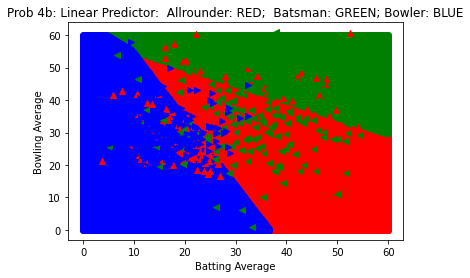

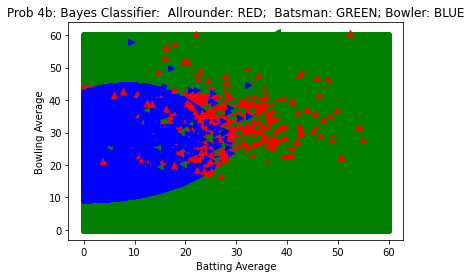

In [37]:
#Extract data and partition from the CSV file
inp = pd.read_csv('Cric_data.csv',usecols=['Batting Average', 'Bowling Average','Player Role']);
#print(inp)

#Splitting data into training (75%) and test (25%) data
rng = RandomState()
train = inp.sample(frac=0.75, random_state=rng)
test = inp.loc[~inp.index.isin(train.index)]

#print(test)\

#Input values 
x_train = train.iloc[:,[0,1]].values;
y_train = train.iloc[:,2].values;
x_test = test.iloc[:,[0,1]].values;
y_test = test.iloc[:,2].values;

#Encoding the labels 
le = preprocessing.LabelEncoder()
le.fit(y_train)
le.fit(y_test)
#print(le.classes_) #['Allrounder' 'Batsman' 'Bowler'] - ['0','1','2'] 
y_train = le.transform(y_train)
y_test = le.transform(y_test)
#print(x_test,y_test)
#print(x_train,y_train)
#print(le.inverse_transform(y_test))

#Define the lossMatrix
lossMatrix = np.array([[0,1,1],[1,0,2],[1,2,0]])

#Defined variables whose meanings are self explanatory
bowling_avg_bowler = 0.0
bowling_avg_batsman = 0.0
bowling_avg_allrounder = 0.0
batting_avg_bowler = 0.0
batting_avg_batsman = 0.0
batting_avg_allrounder = 0.0
num_bowler_in_training = 0
num_batsman_in_training = 0
num_allrounder_in_training = 0
probability_bowler = 0.0
probability_batsman = 0.0
probability_allrounder = 0.0

x_train_final = []
y_train_final = []
for index in range(len(y_train)):
    if y_train[index] == 1:
        y_train_final.append(-1) # -1 indicates Batsman as per CSV file
        x_train_final.append([x_train[index,0],x_train[index,1]])
        batting_avg_batsman += x_train[index,0]
        bowling_avg_batsman += x_train[index,1]
        num_batsman_in_training += 1
    elif y_train[index] == 2:
        y_train_final.append(1) # 1 indicates Bowler as per CSV file
        x_train_final.append([x_train[index,0],x_train[index,1]])
        batting_avg_bowler += x_train[index,0]
        bowling_avg_bowler += x_train[index,1]
        num_bowler_in_training += 1
    elif y_train[index] == 0:
        y_train_final.append(0) #0 indicates Allrounder as per CSV file
        x_train_final.append([x_train[index,0],x_train[index,1]])
        batting_avg_allrounder += x_train[index,0]
        bowling_avg_allrounder += x_train[index,1]
        num_allrounder_in_training += 1

total_training_data = num_bowler_in_training + num_batsman_in_training + num_allrounder_in_training

probability_batsman = float(num_batsman_in_training)/total_training_data
probability_bowler = float(num_bowler_in_training)/float(total_training_data)
probability_allrounder = float(num_allrounder_in_training)/total_training_data
batting_avg_batsman = float(batting_avg_batsman)/num_batsman_in_training #mu_minusOne[0]
batting_avg_bowler = float(batting_avg_bowler)/num_bowler_in_training #mu_plusOne[0]
bowling_avg_batsman = float(bowling_avg_batsman)/num_batsman_in_training #mu_minusOne[1]
bowling_avg_bowler = float(bowling_avg_bowler)/num_bowler_in_training #mu_plusOne[1]
batting_avg_allrounder = float(batting_avg_allrounder)/num_allrounder_in_training #mu_0[0]
bowling_avg_allrounder = float(bowling_avg_allrounder)/num_allrounder_in_training #mu_0[1]


bat11_var = np.float128(0) #Sigma_minusOne[1,1]
bat22_var = np.float128(0) #Sigma_minusOne[2,2]
bat12_var = np.float128(0) #sigma_minusOne[1,2] = Sigma_minusOne[2,1]
bowl11_var = np.float128(0) #Sigma_plusOne[1,1]
bowl12_var = np.float128(0) #Sigma_plusOne[2,2]
bowl22_var = np.float128(0) #Sigma_plusOne[1,2] = Sigma_plusOne[2,1]
all11_var = np.float128(0) #Sigma_0[1,1]
all12_var = np.float128(0) #Sigma_0[2,2]
all22_var = np.float128(0) #Sigma_0[1,2] = Sigma_0[2,1]

for i in range(total_training_data):
    if y_train_final[i] == -1: #Batsman
        bat11_var += (x_train_final[i][0] - batting_avg_batsman)**2
        bat12_var += (x_train_final[i][0] - batting_avg_batsman)*(x_train_final[i][1] - bowling_avg_batsman)
        bat22_var += (x_train_final[i][1] - bowling_avg_batsman)**2 
    elif y_train_final[i] == 1: #Bowler
        bowl11_var += (x_train_final[i][0] - batting_avg_bowler)**2
        bowl12_var += (x_train_final[i][0] - batting_avg_bowler)*(x_train_final[i][1] - bowling_avg_bowler)
        bowl22_var += (x_train_final[i][1] - bowling_avg_bowler)**2
    elif y_train_final[i] == 0: #Allrounder
        all11_var += (x_train_final[i][0] - batting_avg_allrounder)**2
        all12_var += (x_train_final[i][0] - batting_avg_allrounder)*(x_train_final[i][1] - bowling_avg_allrounder)
        all22_var += (x_train_final[i][1] - bowling_avg_allrounder)**2  


#Co-Variance Matrix Batsman - Forming Sigma_minusOne Matrix
bat11_var = np.float128(bat11_var)/num_batsman_in_training
bat12_var = np.float128(bat12_var)/num_batsman_in_training
bat22_var = np.float128(bat22_var)/num_batsman_in_training
detbat = np.float128(bat11_var*bat22_var - (bat12_var**2))
inv_bat11 = bat22_var/detbat
inv_bat12 = -bat12_var/detbat
inv_bat22 = bat11_var/detbat

#Co-Variance Matrix All Rounder - Forming Sigma_0 Matrix
all11_var = np.float128(all11_var)/num_allrounder_in_training
all12_var = np.float128(all12_var)/num_allrounder_in_training
all22_var = np.float128(all22_var)/num_allrounder_in_training
detall = np.float128(all11_var*all22_var - (all12_var**2))
inv_all11 = all22_var/detall
inv_all12 = -all12_var/detall
inv_all22 = all11_var/detall
                  
#Co-Variance Matrix Bowler - Forming Sigma_plusOne Matrix
bowl11_var = np.float128(bowl11_var)/num_bowler_in_training
bowl12_var = np.float128(bowl12_var)/num_bowler_in_training
bowl22_var = np.float128(bowl22_var)/num_bowler_in_training
detbowl = np.float128(bowl11_var*bowl22_var - (bowl12_var**2))
inv_bowl11 = bowl22_var/detbowl
inv_bowl12 = -bowl12_var/detbowl
inv_bowl22 = bowl11_var/detbowl


#Prob(Bowler|(BatAvg,BowlAvg)) = Prob((BatAvg,BowlAvg)|Bowler) * Prob(Bowler)/Prob(BatAvg,BowlAvg)
#Prob(Batsman|(BatAvg,BowlAvg)) = Prob((BatAvg,BowlAvg)|Batsman) * Prob(Batsman)/Prob(BatAvg,BowlAvg)
#Prob(Allrounder|(BatAvg,BowlAvg)) = Prob((BatAvg,BowlAvg)|Allrounder) * Prob(Allrounder)/Prob(BatAvg,BowlAvg)
#Compare: Prob((BatAvg,BowlAvg)|Bowler) * Prob(Bowler) ? Prob((BatAvg,BowlAvg)|Batsman) * Prob(Batsman) ?
#         Prob((BatAvg,BowlAvg)|Allrounder * Prob(Allrounder)

#For Linear: Prob((BatAvg,BowlAvg)| Bowler) follows N(muPlusOne,Identity)
# Prob((BatAvg,BowlAvg)| Batsman) follows N(muMinusOne,Identity)
# Prob((BatAvg,BowlAvg) | Allrounder) follows N(mu_0,Identity)

#ln(Prob((x0,x1)|Batsman)) = -((x0-muMinusOne[0])**2 + (x1-muMinusOne[1])**2)/2 + ln(Prob(Batsman))
#ln(Prob((x0,x1)|Bowler)) = -((x0-muPlusOne[0])**2 + (x1-muPlusOne[1])**2)/2 + ln(Prob(Bowler))
#ln(Prob((x0,x1)|Allrounder)) = -((x0-mu_0[0])**2 + (x1-mu_0[0])**2)/2 + ln(Prob(allrounder))

#Testing Linear Predictor
correct_prediction = 0
total_prediction = 0
cumulative_loss = 0
x_test_final = []
Y_test_pred_lin = []
for index in range(len(y_test)):
    temp_batsman = - ((x_test[index,0] - batting_avg_batsman)**2 + (x_test[index,1] - bowling_avg_batsman)**2)/2 + np.log (probability_batsman)
    temp_bowler = - ( (x_test[index,0] - batting_avg_bowler)**2 + (x_test[index,1] - bowling_avg_bowler)**2)/2 + np.log (probability_bowler)
    temp_allrounder = - ( (x_test[index,0] - batting_avg_allrounder)**2 + (x_test[index,1] - bowling_avg_allrounder)**2)/2 + np.log (probability_allrounder)
    x_test_final.append([x_test[index,0],x_test[index,1]])
    if (temp_batsman < temp_bowler):
        if (temp_bowler < temp_allrounder):
            predict = 0
            Y_test_pred_lin.append(0)
        else:
            predict = 2
            Y_test_pred_lin.append(1)
    else:
        if (temp_allrounder < temp_batsman):
            predict = 1
            Y_test_pred_lin.append(-1)
        else:
            predict = 0
            Y_test_pred_lin.append(0)

    if (predict == y_test[index]):
        correct_prediction += 1
    total_prediction +=1
    cumulative_loss += lossMatrix[predict][y_test[index]]

#Data for discriminating plot
#Using grid of 60 X 60 wth cell size 0.1
dis_plot_linear = np.zeros( (600,600))

for i in range(600):
    for j in range(600):
        temp_batsman = - ((i*0.1 - batting_avg_batsman)**2 + (j*0.1 - bowling_avg_batsman)**2)/2 + np.log (probability_batsman)
        temp_bowler = - ( (i*0.1 - batting_avg_bowler)**2 + (j*0.1 - bowling_avg_bowler)**2)/2 + np.log (probability_bowler)
        temp_allrounder = - ( (i*0.1 - batting_avg_allrounder)**2 + (j*0.1 - bowling_avg_allrounder)**2)/2 + np.log (probability_allrounder)
        if (temp_batsman < temp_bowler):
            if (temp_bowler < temp_allrounder):
                dis_plot_linear[i][j] = 0 #allrounder
            else:
                dis_plot_linear[i][j] = 1 #Bowler
        else:
            if (temp_allrounder < temp_batsman):
                dis_plot_linear[i][j] = -1 #Batsman
            else:
                dis_plot_linear[i][j] = 0 #Allrounder
           
    
print ("Linear Predictor: Prediction Accuracy =", float(correct_prediction)*100/total_prediction," Cumulative Loss =",cumulative_loss)


#For Bayesian: Prob((BatAvg,BowlAvg)| Bowler) follows N(muPlusOne,SigmaPlusOne)
# Prob((BatAvg,BowlAvg)| Batsman) follows N(muMinusOne,SigmaMinusOne)
# Prob( (BatAvg,BowlAvg| Allrounder) follows N(mu_0,sigma0)

#ln(Prob((x0,x1)|Batsman)) = -((x0-muMinus[0])**2/SMinu[1,1] + (x1-muMinus[1])**2)/SMinu[2,2] -2*batcor12*(x0-muMinus[0])*(x1-muMinus[1])/sqrt(Sminu[1,1]*SMinu[2,2]))*bat_coeff - ln(det(SigmaMinus))/2 + ln(Prob(Batsman))
#ln(Prob((x0,x1)|Bowler)) = -((x0-muPlus[0])**2/SPlus[1,1] + (x1-muPlus[1])**2)/SPlus[2,2] -2*bowlcor12*(x0-muPlus[0])*(x1-muPlus[1])/sqrt(SPlus[1,1]*SSplu[2,2]))*bowl_coeff - ln(det(SigmaPlus))/2 + ln(Prob(Bowler))


#Testing Bayesian Classifier
correct_prediction = 0
total_prediction = 0
cumulative_loss = 0
Y_test_pred_bayes = []
for index in range(len(y_test)):
    term_batsman = inv_bat11*(x_test[index,0] - batting_avg_batsman)**2 + 2*inv_bat12*(x_test[index,0] - batting_avg_batsman)*(x_test[index,1] - bowling_avg_batsman) + inv_bat22*(x_test[index,1]-bowling_avg_batsman)**2
    term_bowler = inv_bowl11*(x_test[index,0] - batting_avg_bowler)**2 + 2*inv_bowl12*(x_test[index,0] - batting_avg_bowler)*(x_test[index,1] - bowling_avg_bowler) + inv_bowl22*(x_test[index,1]-bowling_avg_bowler)**2
    term_allrounder = inv_all11*(x_test[index,0] - batting_avg_allrounder)**2 + 2*inv_all12*(x_test[index,0] - batting_avg_allrounder)*(x_test[index,1] - bowling_avg_allrounder) + inv_bowl22*(x_test[index,1]-bowling_avg_allrounder)**2
    temp_batsman = -(term_batsman)/2 - np.log(detbat)/2 + np.log (probability_batsman)
    temp_bowler = -(term_bowler)/2 - np.log(detbowl)/2 + np.log (probability_bowler)
    temp_allrounder = -(term_allrounder)/2 -np.log(detall)/2 + np.log(probability_allrounder)
    if (temp_batsman < temp_bowler):
        if (temp_bowler < temp_allrounder):
            predict = 0
            Y_test_pred_bayes.append(0)
        else:
            predict = 2
            Y_test_pred_bayes.append(1)
    else:
        if (temp_allrounder < temp_batsman):
            predict = 1
            Y_test_pred_bayes.append(-1)
        else:
            predict = 0
            Y_test_pred_bayes.append(0)
    if (predict == y_test[index]):
        correct_prediction += 1
    total_prediction +=1
    cumulative_loss += lossMatrix[predict][y_test[index]]

#Data for discriminating plot
#Again grid of size 60 X 60 with cell size 0.1

dis_plot_Bayesian = np.zeros( (600,600))

for i in range(600):
    for j in range(600):
        term_batsman = inv_bat11*(i*0.1 - batting_avg_batsman)**2 + 2*inv_bat12*(i*0.1 - batting_avg_batsman)*(j*0.1 - bowling_avg_batsman) + inv_bat22*(j*0.1-bowling_avg_batsman)**2
        term_bowler = inv_bowl11*(i*0.1 - batting_avg_bowler)**2 + 2*inv_bowl12*(i*0.1 - batting_avg_bowler)*(j*0.1 - bowling_avg_bowler) + inv_bowl22*(j*0.1 -bowling_avg_bowler)**2
        term_allrounder = inv_all11*(i*0.1- batting_avg_allrounder)**2 + 2*inv_all12*(i*0.1 - batting_avg_allrounder)*(j*0.1- bowling_avg_allrounder) + inv_bowl22*(j*0.1-bowling_avg_allrounder)**2
        temp_batsman = -(term_batsman)/2 - np.log(detbat)/2 + np.log (probability_batsman)
        temp_bowler = -(term_bowler)/2 - np.log(detbowl)/2 + np.log (probability_bowler)
        temp_allrounder = -(term_allrounder)/2 -np.log(detall)/2 + np.log(probability_allrounder)   
        if (temp_batsman < temp_bowler):
            if (temp_bowler < temp_allrounder):
                dis_plot_Bayesian[i][j] = 0 #allrounder
            else:
                dis_plot_Bayesian[i][j] = 1 #Bowler
        else:
            if (temp_allrounder < temp_batsman):
                dis_plot_Bayesian[i][j] = -1 #Batsman
            else:
                dis_plot_Bayesian[i][j] = 0 #Allrounder
    
print( "Bayesian Predictor: Prediction Accuracy =", float(correct_prediction)*100/total_prediction," Cumulative Loss =",cumulative_loss)


#Scatter plot for batting average and bowling average  to visualize the prediction
datalabel_10 = []
datalabel_20 = []
datalabel_11 = []
datalabel_21 = []
datalabel_12 = []
datalabel_22 = []
disdatalabel_10 = []
disdatalabel_20 = []
disdatalabel_11 = []
disdatalabel_21 = []
disdatalabel_12 = []
disdatalabel_22 = []

for i in range(600):
    for j in range(600):
        if (dis_plot_linear[i][j] == 0):
            disdatalabel_10.append(i*0.1)
            disdatalabel_20.append(j*0.1)
        if (dis_plot_linear[i][j] == -1): 
            disdatalabel_11.append(i*0.1)
            disdatalabel_21.append(j*0.1)
        if (dis_plot_linear[i][j] == 1): 
            disdatalabel_12.append(i*0.1)
            disdatalabel_22.append(j*0.1)
for i in range(len(x_train_final)):
    if (y_train_final[i] == 0) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Allrounder
        datalabel_10.append(x_train_final[i][0])
        datalabel_20.append(x_train_final[i][1])
    elif (y_train_final[i] == -1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Batting
        datalabel_11.append(x_train_final[i][0])
        datalabel_21.append(x_train_final[i][1])
    elif (y_train_final[i] == 1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Bowling
        datalabel_12.append(x_train_final[i][0])
        datalabel_22.append(x_train_final[i][1])


figure()
xlabel('Batting Average')
ylabel('Bowling Average')
title('Prob 4b: Linear Predictor:  Allrounder: RED;  Batsman: GREEN; Bowler: BLUE')
scatter(disdatalabel_10, disdatalabel_20,color='r')
scatter(disdatalabel_11, disdatalabel_21,color='g')
scatter(disdatalabel_12, disdatalabel_22,color='b')
scatter(datalabel_10, datalabel_20,color='r',marker='^')
scatter(datalabel_11, datalabel_21,color='g',marker='<')
scatter(datalabel_12, datalabel_22,color='b',marker='>')

datalabel_10 = []
datalabel_20 = []
datalabel_11 = []
datalabel_21 = []
datalabel_12 = []
datalabel_22 = []
disdatalabel_10 = []
disdatalabel_20 = []
disdatalabel_11 = []
disdatalabel_21 = []
disdatalabel_12 = []
disdatalabel_22 = []

for i in range(600):
    for j in range(600):
        if (dis_plot_Bayesian[i][j] == 0):
            disdatalabel_10.append(i*0.1)
            disdatalabel_20.append(j*0.1)
        if (dis_plot_Bayesian[i][j] == -1): 
            disdatalabel_11.append(i*0.1)
            disdatalabel_21.append(j*0.1)
        if (dis_plot_Bayesian[i][j] == 1): 
            disdatalabel_12.append(i*0.1)
            disdatalabel_22.append(j*0.1)
            
for i in range(len(x_train_final)):
    if (y_train_final[i] == 0) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Allrounder
        datalabel_10.append(x_train_final[i][0])
        datalabel_20.append(x_train_final[i][1])
    elif (y_train_final[i] == -1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Batting
        datalabel_11.append(x_train_final[i][0])
        datalabel_21.append(x_train_final[i][1])
    elif (y_train_final[i] == 1) and (x_train_final[i][0] < 61) and (x_train_final[i][1] < 61): #Bowling
        datalabel_12.append(x_train_final[i][0])
        datalabel_22.append(x_train_final[i][1])



figure()
xlabel('Batting Average')
ylabel('Bowling Average')
title('Prob 4b: Bayes Classifier:  Allrounder: RED;  Batsman: GREEN; Bowler: BLUE')
scatter(disdatalabel_10, disdatalabel_20,color='r')
scatter(disdatalabel_11, disdatalabel_21,color='g')
scatter(disdatalabel_12, disdatalabel_22,color='b')
scatter(datalabel_10, datalabel_20,color='r',marker='^')
scatter(datalabel_11, datalabel_21,color='g',marker='<')
scatter(datalabel_12, datalabel_22,color='b',marker='>')

show()


    
    
    

    

**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

In [38]:
#All the four classifiers have been plotted above itself. Kindly refer.

**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.

Observations:

1)The prediction accuracy is higher for bayesian prediction.
2)The prediction accuracy for binary classification is higher than that of tertiary classification.
3)For binary classification under the bayesian predictor, major portion of the graph depicts batsman and for the multi-class classification case, the bayesian predictor, major portion of the graph depcits all-rounder.

Error rates for the classifiers

4a) Linear prediction - 19.5
    Bayesian prediction - 10
4b) Linear prediction - 33.33
    Bayesian prediction - 33.33
    
